# Analogy Task - Word Embeddings

Solving analogies with word embeddings.

> If $a ➡ b$ then $c$ ➡ $d$ : e.g `big` is to `biggest` as `good` is to `best`

> Our model answer questions ▶ $argmax_{d \in D/\ \{a,b,c\}} cos(d, b - a + c)$
where $a,b,c,d \in D$ are vectors of corresponding words. Score of a model is the percentage of questions for wich the result of the formula is correct answer.

Dataset:
- Google analogy test set (State of the art) at https://aclweb.org/aclwiki/Google_analogy_test_set_(State_of_the_art)#cite_note-1, Download the file at: http://download.tensorflow.org/data/questions-words.txt

Reference:
- Main analogy code taken from : Fisseha Berhane, PhD in Operations on word vectors at https://datascience-enthusiast.com/DL/Operations_on_word_vectors.html
- Khuyen Tran (2020) How to Solve Analogies with Word2Vec article in Medium at https://towardsdatascience.com/how-to-solve-analogies-with-word2vec-6ebaf2354009
- Nipun Gupta Github: https://github.com/nipun03/Milkolov-Analogies
- Analogy Test - https://aclweb.org/aclwiki/Analogy_(State_of_the_art)
- Gulonnlp Framework for embedding evaluation at https://nlp.gluon.ai/examples/word_embedding_evaluation/word_embedding_evaluation.html

Map words into vectors of R.
Words that share common contextxs in the corpus located close to one another

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import numpy as np
import pandas as pd

Since some files are really big and I am using Colab I had to upload them each time I started a session and this was taking a lot of time. Hence, I uploaded them in my google drive and I am using my drive as a storage for the files. You can do the same or use the local file if you have enough resources available.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In order to upload a file in Colab because drag and drop uploading feature is not working on my case. You can ignore the following if you are using a local device and local files.

In [ ]:
from google.colab import files
dataset_file_dict = files.upload()

Saving questions-words.txt to questions-words.txt


Test some word2vec models with some other text corpus to compare with our own models and embeddings.

In [ ]:
large_corpus = []
with open('/content/line_corpus.txt', 'r') as inp:
    for line in inp:
        large_corpus.append(line.split())

small_corpus = []
with open('/content/small_line_corpus.txt', 'r') as inp:
    for line in inp:
        small_corpus.append(line.split())

In [ ]:
# Some other models just for testing with our corpus
word2vec_small = Word2Vec(small_corpus, iter=100, min_count=10, size=128, workers=4)
word2vec_big = Word2Vec(large_corpus, iter=100, min_count=10, size=128, workers=4)

Loading our embedding vectors from the drive and the dataset file.

You need to change the path of the files accordingly

In [ ]:
improved_wg2v_file = "/content/gdrive/MyDrive/GloveEmbeddings/embeddings_50_enhanced_200k_small.tsv"
original_wg2v_file = "/content/gdrive/MyDrive/GloveEmbeddings/embeddings_50_enhanced_200k.tsv"
loss_wg2v_file = "/content/gdrive/MyDrive/GloveEmbeddings/embeddings_original_graph_wg2v.tsv"
baseline_w2v_file = "/content/gdrive/MyDrive/GloveEmbeddings/embeddings_50_normal_big.tsv"
synonym_w2v_file = "/content/gdrive/MyDrive/GloveEmbeddings/embeddings_synonym_relation_w2v.tsv"
hypernym_w2v_file = "/content/gdrive/MyDrive/GloveEmbeddings/embeddings_hypernym_relation_w2v.tsv"

In [ ]:
enahnced_file = "/content/gdrive/MyDrive/GloveEmbeddings/embeddings_128_enhanced_ws3.tsv"
normal_file = "/content/gdrive/MyDrive/GloveEmbeddings/embeddings_128_normal_ws3.tsv"

In [ ]:
glove_file = "/content/gdrive/MyDrive/GloveEmbeddings/glove.twitter.27B.200d.txt"

In [ ]:
analogy_file = '/content/questions-words.txt'
analogy_list = []
with open(analogy_file, 'r') as inp:
    for line in inp:
        if 'capital-common-countries' in line:
            continue
        words = line.lower().strip().split()
        analogy_list.append(words)

In [ ]:
analogy_set = pd.DataFrame(analogy_list)

In [ ]:
analogy_set.head()

,0,1,2,3
0,athens,greece,baghdad,iraq
1,athens,greece,bangkok,thailand
2,athens,greece,beijing,china
3,athens,greece,berlin,germany
4,athens,greece,bern,switzerland


A method to convert from TSV to txt file, needed to run the gensim.

In [ ]:
def writeEmbeddings2File(file, title='word2vec-enhanced-format.txt', line_count='60400', dimensions='100'):
    with open(file, 'r') as inp, open('/content/'+title, 'w') as outp:
        # The genism library needs the fist line of text to be line_count dimensions
        # There is a wrong number
        outp.write(' '.join([line_count, dimensions]) + '\n')
        for line in inp:
            if '60401 128' in line:
                print(line)
                continue
            words = line.strip().split()
            outp.write(' '.join(words) + '\n')

In [ ]:
writeEmbeddings2File(normal_file, 'word2vec-normal-format.txt', dimensions='128')

In [ ]:
with open(enahnced_file, 'r') as inp, open('/content/word2vec-enhanced-format.txt', 'w') as outp:
    # The genism library needs the fist line of text to be line_count dimensions
    # There is a wrong number
    line_count = '60400'    # line count of the tsv file (as string)
    dimensions = '128'    # vector size (as string)
    outp.write(' '.join([line_count, dimensions]) + '\n')
    for line in inp:
        if '60401 128' in line:
            print(line)
            continue
        words = line.strip().split()
        outp.write(' '.join(words) + '\n')

In [ ]:
writeEmbeddings2File(improved_wg2v_file, 'wg2v-improved.txt', '131110', '50')
writeEmbeddings2File(original_wg2v_file, 'wg2v-original.txt', '282164', '50')
writeEmbeddings2File(loss_wg2v_file, 'wg2v-loss.txt', '253696')
writeEmbeddings2File(baseline_w2v_file, 'w2v-baseline.txt', '282164', '50')
writeEmbeddings2File(synonym_w2v_file, 'w2v-synonym.txt', '253696')
writeEmbeddings2File(hypernym_w2v_file, 'w2v-hypernym.txt', '253696')

In [ ]:
with open('/content/w2v-baseline.txt', 'r') as f:
    text = f.read()
text[:100]

'282164 50\n[UNK] -0.037252843 0.027138237 -0.010363817 -0.047187783 0.041901793 -0.041833855 -0.03042'

In [ ]:
word2vec_model_enhanced = KeyedVectors.load_word2vec_format('/content/word2vec-enhanced-format.txt')
word2vec_model_normal = KeyedVectors.load_word2vec_format('/content/word2vec-normal-format.txt')
wordgraph2vec_improved = KeyedVectors.load_word2vec_format('/content/wg2v-improved.txt')
wordgraph2vec_original = KeyedVectors.load_word2vec_format('/content/wg2v-original.txt')
wordgraph2vec_loss = KeyedVectors.load_word2vec_format('/content/wg2v-loss.txt')
word2vec_baseline = KeyedVectors.load_word2vec_format('/content/w2v-baseline.txt')
word2vec_synonym = KeyedVectors.load_word2vec_format('/content/w2v-synonym.txt')
word2vec_hypernym = KeyedVectors.load_word2vec_format('/content/w2v-hypernym.txt')

In [ ]:
word2vec_model = KeyedVectors.load_word2vec_format(glove_file)

# Extra methods that might help
# path_glove = os.path.abspath('glove.twitter.27B/glove.twitter.27B.200d.txt')
# path_w2v = os.path.abspath('glove.twitter.27B/glove.twitter.27B.200d_w2v.txt')
# glove_file = datapath(path_glove)
# tmp_file = get_tmpfile(path_w2v)
# _ = glove2word2vec(glove_file, tmp_file)
# path = os.path.abspath('/content/glove.twitter.27B.200d_w2v.txt')
# model = KeyedVectors.load_word2vec_format(path, binary=False)

In [ ]:
print(word2vec_model_enhanced.most_similar(positive=['love']))
print(word2vec_model_normal.most_similar(positive=['love']))

[('aboardboatswain', 0.5006822347640991), ('saymadamsweetheartwhy', 0.48838919401168823), ('bridewhat', 0.4867592751979828), ('lightenssweet', 0.479088693857193), ('decayrather', 0.4758055508136749), ('hererosaline', 0.47497984766960144), ('policyqueen', 0.4685123562812805), ('capuletromeo', 0.4676735997200012), ('youparis', 0.46702253818511963), ('doubtthat', 0.462902307510376)]
[('honourduke', 0.5923405885696411), ('praytranio', 0.5792211294174194), ('breeder', 0.565059244632721), ('friendthird', 0.5606236457824707), ('conceald', 0.557123601436615), ('sirbiondello', 0.5556697845458984), ('atonement', 0.5491896867752075), ('graceedward', 0.5482177138328552), ('comesthou', 0.5478737354278564), ('wayduke', 0.5464489459991455)]


## Cosine Similariyt

In [ ]:
def cosine_similarity(u, v):
    """
    Cosine similarity reflects the degree of similariy between u and v
    Arguments:
        u -- a word vector of shape (n,)
        v -- a word vector of shape (n,)
    Returns:
        cosine_similarity -- the cosine similarity between u and v defined by the formula above.
    """
    distance = 0.0
    # Compute the dot product between u and v (≈1 line)
    dot = np.dot(u, v)
    # Compute the L2 norm of u (≈1 line)
    norm_u = np.sqrt(np.sum(u**2))
    # Compute the L2 norm of v (≈1 line)
    norm_v = np.sqrt(np.sum(v**2))
    # Compute the cosine similarity defined by formula (1) (≈1 line)
    cosine_similarity = dot / np.dot(norm_u, norm_v)
    return cosine_similarity

### Comple the analogy (Task)

In [ ]:
def complete_analogy(word_a, word_b, word_c, word_to_vec_map):
    """
    Performs the word analogy task as explained above: a is to b as c is to ____.

    Arguments:
    word_a -- a word, string
    word_b -- a word, string
    word_c -- a word, string
    word_to_vec_map -- dictionary that maps words to their corresponding vectors.

    Returns:
    best_word --  the word such that v_b - v_a is close to v_best_word - v_c, as measured by cosine similarity
    """

    # convert words to lower case
    word_a, word_b, word_c = word_a.lower(), word_b.lower(), word_c.lower()
    # Get the word embeddings v_a, v_b and v_c (≈1-3 lines)
    e_a, e_b, e_c = word_to_vec_map[word_a], word_to_vec_map[word_b], word_to_vec_map[word_c]
    ### END CODE HERE ###
    words = word_to_vec_map.vocab.keys()
    max_cosine_sim = -100 # Initialize max_cosine_sim to a large negative number
    best_word = None # Initialize best_word with None, it will help keep track of the word to output

    # loop over the whole word vector set
    for w in words:
        # to avoid best_word being one of the input words, pass on them.
        if w in [word_a, word_b, word_c] :
            continue
        # Compute cosine similarity between the vector (e_b - e_a) and the vector ((w's vector representation) - e_c)  (≈1 line)
        cosine_sim = cosine_similarity((e_b - e_a), (word_to_vec_map[w] - e_c))
        # If the cosine_sim is more than the max_cosine_sim seen so far,
            # then: set the new max_cosine_sim to the current cosine_sim and the best_word to the current word (≈3 lines)
        if cosine_sim > max_cosine_sim:
            max_cosine_sim = cosine_sim
            best_word = w
        ### END CODE HERE ###

    return best_word

In [ ]:
print(complete_analogy('England', 'london', 'Austria', word2vec_model_enhanced))
print(complete_analogy('England', 'london', 'Austria', word2vec_model_normal))
print(complete_analogy('England', 'london', 'Austria', word2vec_model))
print(complete_analogy('write', 'writes', 'think', word2vec_model_enhanced))
print(complete_analogy('write', 'writes', 'think', word2vec_model_normal))
print(complete_analogy('write', 'writes', 'think', word2vec_model))

quoting
contributed
shoreditch
evangelization
capped
thinks


A simple and a faster method for testing

In [ ]:
def analogy(worda, wordb, wordc, word2vec_model):
    try:
        result = word2vec_model.most_similar(negative=[worda], positive=[wordb, wordc])
    except Exception as e:
        return 'not found'
    return result[0][0]

In [ ]:
def do_analogy_task(analogy_set, model):
    found = 0
    not_found = 0
    missing_word = 0
    import tqdm
    for index, analogy_test in analogy_set.iterrows():
        if index != 0 and index % 1000 == 0:
            print(f'>>  Checked {index} words and found {found} answers correct, {not_found} wrong and {missing_word} OOV words')
        worda, wordb, wordc, wordd = analogy_test[0], analogy_test[1], analogy_test[2], analogy_test[3]
        new_word = analogy(worda, wordb, wordc, model)
        if new_word == 'not found':
            missing_word += 1
        if new_word == wordd:
            found += 1
        else:
            not_found += 1

In [ ]:
do_analogy_task(analogy_set, word2vec_model_enhanced)

>>  Checked 1000 words and found 370 answers correct, 630 wrong and 77 OOV words
>>  Checked 2000 words and found 505 answers correct, 1495 wrong and 194 OOV words
>>  Checked 3000 words and found 615 answers correct, 2385 wrong and 386 OOV words
>>  Checked 4000 words and found 785 answers correct, 3215 wrong and 569 OOV words
>>  Checked 5000 words and found 950 answers correct, 4050 wrong and 751 OOV words
>>  Checked 6000 words and found 950 answers correct, 5050 wrong and 1034 OOV words
>>  Checked 7000 words and found 950 answers correct, 6050 wrong and 1466 OOV words
>>  Checked 8000 words and found 965 answers correct, 7035 wrong and 2102 OOV words
>>  Checked 9000 words and found 1000 answers correct, 8000 wrong and 2588 OOV words
>>  Checked 10000 words and found 1010 answers correct, 8990 wrong and 2830 OOV words
>>  Checked 11000 words and found 1015 answers correct, 9985 wrong and 3185 OOV words
>>  Checked 12000 words and found 1020 answers correct, 10980 wrong and 3257 O

In [ ]:
do_analogy_task(analogy_set, wordgraph2vec_improved)

>>  Checked 1000 words and found 135 answers correct, 865 wrong and 111 OOV words
>>  Checked 2000 words and found 175 answers correct, 1825 wrong and 182 OOV words
>>  Checked 3000 words and found 235 answers correct, 2765 wrong and 222 OOV words
>>  Checked 4000 words and found 310 answers correct, 3690 wrong and 260 OOV words
>>  Checked 5000 words and found 360 answers correct, 4640 wrong and 381 OOV words
>>  Checked 6000 words and found 390 answers correct, 5610 wrong and 384 OOV words
>>  Checked 7000 words and found 570 answers correct, 6430 wrong and 402 OOV words
>>  Checked 8000 words and found 665 answers correct, 7335 wrong and 457 OOV words
>>  Checked 9000 words and found 980 answers correct, 8020 wrong and 481 OOV words
>>  Checked 10000 words and found 1005 answers correct, 8995 wrong and 482 OOV words
>>  Checked 11000 words and found 1080 answers correct, 9920 wrong and 483 OOV words
>>  Checked 12000 words and found 1165 answers correct, 10835 wrong and 483 OOV word

In [ ]:
do_analogy_task(analogy_set, wordgraph2vec_original)

>>  Checked 1000 words and found 70 answers correct, 930 wrong and 12 OOV words
>>  Checked 2000 words and found 110 answers correct, 1890 wrong and 39 OOV words
>>  Checked 3000 words and found 150 answers correct, 2850 wrong and 79 OOV words
>>  Checked 4000 words and found 195 answers correct, 3805 wrong and 79 OOV words
>>  Checked 5000 words and found 220 answers correct, 4780 wrong and 79 OOV words
>>  Checked 6000 words and found 275 answers correct, 5725 wrong and 81 OOV words
>>  Checked 7000 words and found 460 answers correct, 6540 wrong and 81 OOV words
>>  Checked 8000 words and found 655 answers correct, 7345 wrong and 81 OOV words
>>  Checked 9000 words and found 910 answers correct, 8090 wrong and 83 OOV words
>>  Checked 10000 words and found 915 answers correct, 9085 wrong and 84 OOV words
>>  Checked 11000 words and found 960 answers correct, 10040 wrong and 85 OOV words
>>  Checked 12000 words and found 1030 answers correct, 10970 wrong and 85 OOV words
>>  Checked 

In [ ]:
do_analogy_task(analogy_set, wordgraph2vec_loss)

>>  Checked 1000 words and found 2 answers correct, 998 wrong and 57 OOV words
>>  Checked 2000 words and found 3 answers correct, 1997 wrong and 84 OOV words
>>  Checked 3000 words and found 3 answers correct, 2997 wrong and 149 OOV words
>>  Checked 4000 words and found 3 answers correct, 3997 wrong and 232 OOV words
>>  Checked 5000 words and found 4 answers correct, 4996 wrong and 309 OOV words
>>  Checked 6000 words and found 4 answers correct, 5996 wrong and 340 OOV words
>>  Checked 7000 words and found 4 answers correct, 6996 wrong and 340 OOV words
>>  Checked 8000 words and found 4 answers correct, 7996 wrong and 340 OOV words
>>  Checked 9000 words and found 4 answers correct, 8996 wrong and 432 OOV words
>>  Checked 10000 words and found 4 answers correct, 9996 wrong and 491 OOV words
>>  Checked 11000 words and found 4 answers correct, 10996 wrong and 492 OOV words
>>  Checked 12000 words and found 4 answers correct, 11996 wrong and 492 OOV words
>>  Checked 13000 words an

In [ ]:
do_analogy_task(analogy_set, word2vec_baseline)

>>  Checked 1000 words and found 169 answers correct, 831 wrong and 12 OOV words
>>  Checked 2000 words and found 269 answers correct, 1731 wrong and 39 OOV words
>>  Checked 3000 words and found 338 answers correct, 2662 wrong and 79 OOV words
>>  Checked 4000 words and found 397 answers correct, 3603 wrong and 79 OOV words
>>  Checked 5000 words and found 458 answers correct, 4542 wrong and 79 OOV words
>>  Checked 6000 words and found 488 answers correct, 5512 wrong and 81 OOV words
>>  Checked 7000 words and found 517 answers correct, 6483 wrong and 81 OOV words
>>  Checked 8000 words and found 559 answers correct, 7441 wrong and 81 OOV words
>>  Checked 9000 words and found 646 answers correct, 8354 wrong and 83 OOV words
>>  Checked 10000 words and found 656 answers correct, 9344 wrong and 84 OOV words
>>  Checked 11000 words and found 697 answers correct, 10303 wrong and 85 OOV words
>>  Checked 12000 words and found 759 answers correct, 11241 wrong and 85 OOV words
>>  Checked 

In [ ]:
do_analogy_task(analogy_set, word2vec_synonym)

In [ ]:
do_analogy_task(analogy_set, word2vec_hypernym)

>>  Checked 1000 words and found 31 answers correct, 969 wrong and 57 OOV words
>>  Checked 2000 words and found 61 answers correct, 1939 wrong and 84 OOV words
>>  Checked 3000 words and found 90 answers correct, 2910 wrong and 149 OOV words
>>  Checked 4000 words and found 118 answers correct, 3882 wrong and 232 OOV words
>>  Checked 5000 words and found 145 answers correct, 4855 wrong and 309 OOV words
>>  Checked 6000 words and found 171 answers correct, 5829 wrong and 340 OOV words
>>  Checked 7000 words and found 196 answers correct, 6804 wrong and 340 OOV words
>>  Checked 8000 words and found 220 answers correct, 7780 wrong and 340 OOV words
>>  Checked 9000 words and found 243 answers correct, 8757 wrong and 432 OOV words
>>  Checked 10000 words and found 265 answers correct, 9735 wrong and 491 OOV words
>>  Checked 11000 words and found 297 answers correct, 10702 wrong and 492 OOV words
>>  Checked 12000 words and found 317 answers correct, 11682 wrong and 492 OOV words
>>  C

### Old Test and Experiments

In [ ]:
found = 0
not_found = 0
missing_word = 0
import tqdm
for index, analogy_test in analogy_set.iterrows():
    if index != 0 and index % 1000 == 0:
        print(f'Checked {index} words and found {found} answers correct, {not_found} wrong and {missing_word} OOV words')
    worda, wordb, wordc, wordd = analogy_test[0], analogy_test[1], analogy_test[2], analogy_test[3]
    new_word = analogy(worda, wordb, wordc, word2vec_model_normal)
    if new_word == 'not found':
        missing_word += 1
    if new_word == wordd:
        found += 1
    else:
        not_found += 1

Checked 1000 words and found 2 answers correct, 998 wrong and 77 OOV words
Checked 2000 words and found 2 answers correct, 1998 wrong and 194 OOV words
Checked 3000 words and found 2 answers correct, 2998 wrong and 386 OOV words
Checked 4000 words and found 2 answers correct, 3998 wrong and 569 OOV words
Checked 5000 words and found 2 answers correct, 4998 wrong and 751 OOV words
Checked 6000 words and found 2 answers correct, 5998 wrong and 1034 OOV words
Checked 7000 words and found 2 answers correct, 6998 wrong and 1466 OOV words
Checked 8000 words and found 4 answers correct, 7996 wrong and 2102 OOV words
Checked 9000 words and found 5 answers correct, 8995 wrong and 2588 OOV words
Checked 10000 words and found 5 answers correct, 9995 wrong and 2830 OOV words
Checked 11000 words and found 5 answers correct, 10995 wrong and 3185 OOV words
Checked 12000 words and found 5 answers correct, 11995 wrong and 3257 OOV words
Checked 13000 words and found 5 answers correct, 12995 wrong and 3

In [ ]:
print('Normal Embeddings\n')
print(f'Checked {index} words and found {found} answers correct, {not_found} wrong and {missing_word} OOV words')

In [ ]:
found = 0
not_found = 0
missing_word = 0
import tqdm
for index, analogy_test in analogy_set.iterrows():
    if index != 0 and index % 1000 == 0:
        print(f'Checked {index} words and found {found} answers correct, {not_found} wrong and {missing_word} OOV words')
    worda, wordb, wordc, wordd = analogy_test[0], analogy_test[1], analogy_test[2], analogy_test[3]
    new_word = analogy(worda, wordb, wordc, word2vec_model_enhanced)
    if new_word == 'not found':
        missing_word += 1
    if new_word == wordd:
        found += 1
    else:
        not_found += 1

Checked 1000 words and found 44 answers correct, 956 wrong and 77 OOV words
Checked 2000 words and found 58 answers correct, 1942 wrong and 194 OOV words
Checked 3000 words and found 64 answers correct, 2936 wrong and 386 OOV words
Checked 4000 words and found 75 answers correct, 3925 wrong and 569 OOV words
Checked 5000 words and found 87 answers correct, 4913 wrong and 751 OOV words
Checked 6000 words and found 88 answers correct, 5912 wrong and 1034 OOV words
Checked 7000 words and found 88 answers correct, 6912 wrong and 1466 OOV words
Checked 8000 words and found 92 answers correct, 7908 wrong and 2102 OOV words
Checked 9000 words and found 94 answers correct, 8906 wrong and 2588 OOV words
Checked 10000 words and found 94 answers correct, 9906 wrong and 2830 OOV words
Checked 11000 words and found 94 answers correct, 10906 wrong and 3185 OOV words
Checked 12000 words and found 95 answers correct, 11905 wrong and 3257 OOV words
Checked 13000 words and found 98 answers correct, 1290

In [ ]:
print('Enhanced Embeddings\n')
print(f'Checked {index} words and found {found} answers correct, {not_found} wrong and {missing_word} OOV words')

Enhanced Embeddings

Checked 19556 words and found 192 answers correct, 19365 wrong and 4577 OOV words


In [ ]:
found = 0
not_found = 0
missing_word = 0
import tqdm
for index, analogy_test in analogy_set.iterrows():
    if index != 0 and index % 1000 == 0:
        print(f'Checked {index} words and found {found} answers correct, {not_found} wrong and {missing_word} OOV words')
    worda, wordb, wordc, wordd = analogy_test[0], analogy_test[1], analogy_test[2], analogy_test[3]
    new_word = analogy(worda, wordb, wordc, word2vec_model)
    if new_word == 'not found':
        missing_word += 1
    if new_word == wordd:
        found += 1
    else:
        not_found += 1

Checked 1000 words and found 609 answers correct, 391 wrong and 104 OOV words
Checked 2000 words and found 1180 answers correct, 820 wrong and 288 OOV words
Checked 3000 words and found 1856 answers correct, 1144 wrong and 366 OOV words
Checked 4000 words and found 2549 answers correct, 1451 wrong and 420 OOV words
Checked 5000 words and found 3095 answers correct, 1905 wrong and 599 OOV words
Checked 6000 words and found 3170 answers correct, 2830 wrong and 662 OOV words
Checked 7000 words and found 3504 answers correct, 3496 wrong and 662 OOV words
Checked 8000 words and found 3867 answers correct, 4133 wrong and 662 OOV words
Checked 9000 words and found 4368 answers correct, 4632 wrong and 664 OOV words
Checked 10000 words and found 4497 answers correct, 5503 wrong and 665 OOV words
Checked 11000 words and found 4898 answers correct, 6102 wrong and 694 OOV words
Checked 12000 words and found 5642 answers correct, 6358 wrong and 694 OOV words
Checked 13000 words and found 6291 answe

In [ ]:
print('Enhanced Embeddings\n')
print(f'Checked {index} words and found {found} answers correct, {not_found} wrong and {missing_word} OOV words')

Enhanced Embeddings

Checked 19556 words and found 10271 answers correct, 9286 wrong and 739 OOV words


In [ ]:
found = 0
not_found = 0
missing_word = 0
import tqdm
for index, analogy_test in analogy_set.iterrows():
    if index != 0 and index % 1000 == 0:
        print(f'Checked {index} words and found {found} answers correct, {not_found} wrong and {missing_word} OOV words')
    worda, wordb, wordc, wordd = analogy_test[0], analogy_test[1], analogy_test[2], analogy_test[3]
    new_word = analogy(worda, wordb, wordc, word2vec_model_normal)
    if new_word == 'not found':
        missing_word += 1
    if new_word == wordd:
        found += 1
    else:
        not_found += 1

Checked 1000 words and found 0 answers correct, 1000 wrong and 77 OOV words
Checked 2000 words and found 0 answers correct, 2000 wrong and 194 OOV words
Checked 3000 words and found 0 answers correct, 3000 wrong and 386 OOV words
Checked 4000 words and found 0 answers correct, 4000 wrong and 569 OOV words
Checked 5000 words and found 0 answers correct, 5000 wrong and 751 OOV words
Checked 6000 words and found 0 answers correct, 6000 wrong and 1034 OOV words
Checked 7000 words and found 3 answers correct, 6997 wrong and 1466 OOV words
Checked 8000 words and found 6 answers correct, 7994 wrong and 2102 OOV words
Checked 9000 words and found 8 answers correct, 8992 wrong and 2588 OOV words
Checked 10000 words and found 8 answers correct, 9992 wrong and 2830 OOV words
Checked 11000 words and found 8 answers correct, 10992 wrong and 3185 OOV words
Checked 12000 words and found 8 answers correct, 11992 wrong and 3257 OOV words
Checked 13000 words and found 8 answers correct, 12992 wrong and 

In [ ]:
print('Normal Embeddings WS3\n')
print(f'Checked {index} words and found {found} answers correct, {not_found} wrong and {missing_word} OOV words')

Normal Embeddings WS3

Checked 19556 words and found 10 answers correct, 19547 wrong and 4577 OOV words


In [ ]:
found = 0
not_found = 0
missing_word = 0
import tqdm
for index, analogy_test in analogy_set.iterrows():
    if index != 0 and index % 1000 == 0:
        print(f'Checked {index} words and found {found} answers correct, {not_found} wrong and {missing_word} OOV words')
    worda, wordb, wordc, wordd = analogy_test[0], analogy_test[1], analogy_test[2], analogy_test[3]
    new_word = analogy(worda, wordb, wordc, word2vec_model_enhanced)
    if new_word == 'not found':
        missing_word += 1
    if new_word == wordd:
        found += 1
    else:
        not_found += 1

Checked 1000 words and found 74 answers correct, 926 wrong and 77 OOV words
Checked 2000 words and found 101 answers correct, 1899 wrong and 194 OOV words
Checked 3000 words and found 123 answers correct, 2877 wrong and 386 OOV words
Checked 4000 words and found 157 answers correct, 3843 wrong and 569 OOV words
Checked 5000 words and found 190 answers correct, 4810 wrong and 751 OOV words
Checked 6000 words and found 190 answers correct, 5810 wrong and 1034 OOV words
Checked 7000 words and found 190 answers correct, 6810 wrong and 1466 OOV words
Checked 8000 words and found 193 answers correct, 7807 wrong and 2102 OOV words
Checked 9000 words and found 200 answers correct, 8800 wrong and 2588 OOV words
Checked 10000 words and found 202 answers correct, 9798 wrong and 2830 OOV words
Checked 11000 words and found 203 answers correct, 10797 wrong and 3185 OOV words
Checked 12000 words and found 204 answers correct, 11796 wrong and 3257 OOV words
Checked 13000 words and found 208 answers c

In [ ]:
print('Normal Embeddings WS3\n')
print(f'Checked {index} words and found {found} answers correct, {not_found} wrong and {missing_word} OOV words')

Normal Embeddings WS3

Checked 19556 words and found 10 answers correct, 19547 wrong and 4577 OOV words


In [ ]:
found = 0
not_found = 0
missing_word = 0
import tqdm
for index, analogy_test in analogy_set.iterrows():
    if index != 0 and index % 1000 == 0:
        print(f'Checked {index} words and found {found} answers correct, {not_found} wrong and {missing_word} OOV words')
    worda, wordb, wordc, wordd = analogy_test[0], analogy_test[1], analogy_test[2], analogy_test[3]
    new_word = analogy(worda, wordb, wordc, word2vec_small)
    if new_word == 'not found':
        missing_word += 1
    if new_word == wordd:
        found += 1
    else:
        not_found += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


Checked 1000 words and found 114 answers correct, 886 wrong and 496 OOV words
Checked 2000 words and found 156 answers correct, 1844 wrong and 1192 OOV words
Checked 3000 words and found 188 answers correct, 2812 wrong and 2011 OOV words
Checked 4000 words and found 220 answers correct, 3780 wrong and 2861 OOV words
Checked 5000 words and found 251 answers correct, 4749 wrong and 3664 OOV words
Checked 6000 words and found 255 answers correct, 5745 wrong and 4381 OOV words
Checked 7000 words and found 256 answers correct, 6744 wrong and 5316 OOV words
Checked 8000 words and found 259 answers correct, 7741 wrong and 6307 OOV words
Checked 9000 words and found 294 answers correct, 8706 wrong and 7123 OOV words
Checked 10000 words and found 297 answers correct, 9703 wrong and 7821 OOV words
Checked 11000 words and found 311 answers correct, 10689 wrong and 8583 OOV words
Checked 12000 words and found 343 answers correct, 11657 wrong and 9080 OOV words
Checked 13000 words and found 364 ans

In [ ]:
print('Small Embeddings\n')
print(f'Checked {index} words and found {found} answers correct, {not_found} wrong and {missing_word} OOV words')

Small Embeddings

Checked 19556 words and found 794 answers correct, 18763 wrong and 12903 OOV words


In [ ]:
found = 0
not_found = 0
missing_word = 0
import tqdm
for index, analogy_test in analogy_set.iterrows():
    if index != 0 and index % 1000 == 0:
        print(f'Checked {index} words and found {found} answers correct, {not_found} wrong and {missing_word} OOV words')
    worda, wordb, wordc, wordd = analogy_test[0], analogy_test[1], analogy_test[2], analogy_test[3]
    new_word = analogy(worda, wordb, wordc, word2vec_big)
    if new_word == 'not found':
        missing_word += 1
    if new_word == wordd:
        found += 1
    else:
        not_found += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


Checked 1000 words and found 567 answers correct, 433 wrong and 188 OOV words
Checked 2000 words and found 940 answers correct, 1060 wrong and 458 OOV words
Checked 3000 words and found 1232 answers correct, 1768 wrong and 808 OOV words
Checked 4000 words and found 1533 answers correct, 2467 wrong and 1096 OOV words
Checked 5000 words and found 1880 answers correct, 3120 wrong and 1366 OOV words
Checked 6000 words and found 2003 answers correct, 3997 wrong and 1603 OOV words
Checked 7000 words and found 2197 answers correct, 4803 wrong and 1646 OOV words
Checked 8000 words and found 2408 answers correct, 5592 wrong and 1849 OOV words
Checked 9000 words and found 2675 answers correct, 6325 wrong and 2119 OOV words
Checked 10000 words and found 2799 answers correct, 7201 wrong and 2155 OOV words
Checked 11000 words and found 2996 answers correct, 8004 wrong and 2343 OOV words
Checked 12000 words and found 3474 answers correct, 8526 wrong and 2343 OOV words
Checked 13000 words and found 3

In [ ]:
print('Big Embeddings\n')
print(f'Checked {index} words and found {found} answers correct, {not_found} wrong and {missing_word} OOV words')

Big Embeddings

Checked 19556 words and found 6447 answers correct, 13110 wrong and 2660 OOV words


In [ ]:
countries = ['australia', 'canada', 'germany', 'ireland', 'italy']
foods = [analogy('us', 'hamburger', country) for country in countries]
pp(zip(countries,foods))

,0,1
0,australia,hotdog
1,canada,poutine
2,germany,hamburg
3,ireland,cheeseburger
4,italy,bologna


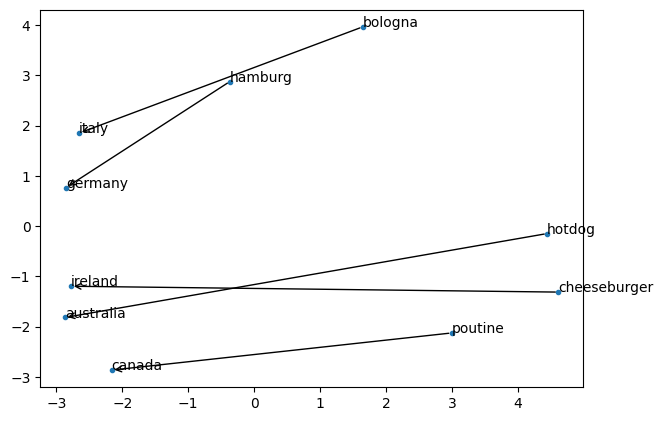

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def plot_data(orig_data, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(orig_data)
    plt.figure(figsize=(7, 5), dpi=100)
    plt.plot(data[:,0], data[:,1], '.')
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i])
    for i in range(len(data)//2):
        plt.annotate("",
                xy=data[i],
                xytext=data[i+len(data)//2],
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3")
        )

labels = countries + foods
data = [word2vec_model[w] for w in labels]
plot_data(data, labels)